# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install imbalanced-learn

In [3]:
!pip install XGBoost

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# I. Exploratory Data Analysis

# Data Quality Check

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59511 entries, 0 to 59510
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    59511 non-null  int64  
 1   V1      59511 non-null  float64
 2   V2      59511 non-null  float64
 3   V3      59511 non-null  float64
 4   V4      59511 non-null  float64
 5   V5      59511 non-null  float64
 6   V6      59511 non-null  float64
 7   V7      59511 non-null  float64
 8   V8      59511 non-null  float64
 9   V9      59511 non-null  float64
 10  V10     59511 non-null  float64
 11  V11     59511 non-null  float64
 12  V12     59511 non-null  float64
 13  V13     59511 non-null  float64
 14  V14     59511 non-null  float64
 15  V15     59511 non-null  float64
 16  V16     59510 non-null  float64
 17  V17     59510 non-null  float64
 18  V18     59510 non-null  float64
 19  V19     59510 non-null  float64
 20  V20     59510 non-null  float64
 21  V21     59510 non-null  float64
 22

In [8]:
print(df.dtypes)

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,...,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000
mean,31748.304398,-0.238817,-0.010192,0.688628,0.171355,-0.259802,0.102828,-0.114713,0.055186,0.063558,...,-0.027845,-0.107505,-0.039753,0.006762,0.136147,0.020146,0.002969,0.004292,95.417957,0.002722
std,13666.604320,1.866654,1.658360,1.446481,1.386071,1.394132,1.308181,1.251962,1.191471,1.183014,...,0.723975,0.637525,0.594265,0.596854,0.438683,0.498979,0.384503,0.325266,270.114653,0.052104
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,26157.000000,-0.993866,-0.581502,0.204150,-0.726730,-0.877828,-0.636651,-0.604518,-0.145127,-0.648030,...,-0.228746,-0.527697,-0.179894,-0.325270,-0.128046,-0.330056,-0.063393,-0.006316,7.680000,0.000000
50%,35617.000000,-0.245303,0.075692,0.779272,0.184175,-0.293976,-0.151705,-0.074176,0.061639,-0.039883,...,-0.063847,-0.082948,-0.051941,0.061830,0.174226,-0.075484,0.008921,0.022539,25.950000,0.000000
75%,42028.000000,1.155001,0.731551,1.413495,1.053194,0.278931,0.492737,0.424395,0.337132,0.735236,...,0.112591,0.307969,0.078831,0.403203,0.422293,0.297880,0.082628,0.076307,87.540000,0.000000
max,48871.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [11]:
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

Class
0.0    99.727777
1.0     0.272223
Name: proportion, dtype: float64


# Statistical Analysis using Visualizations

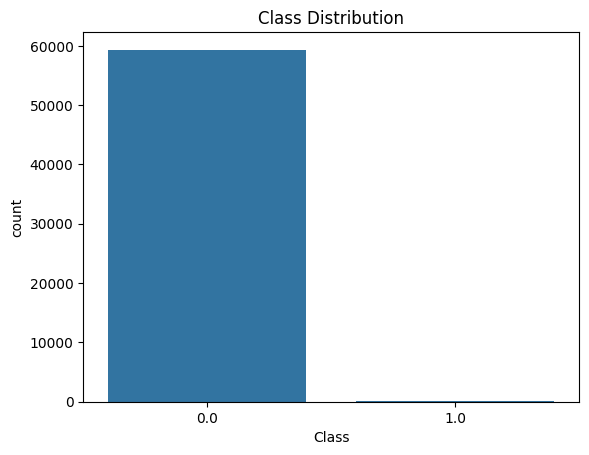

In [12]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

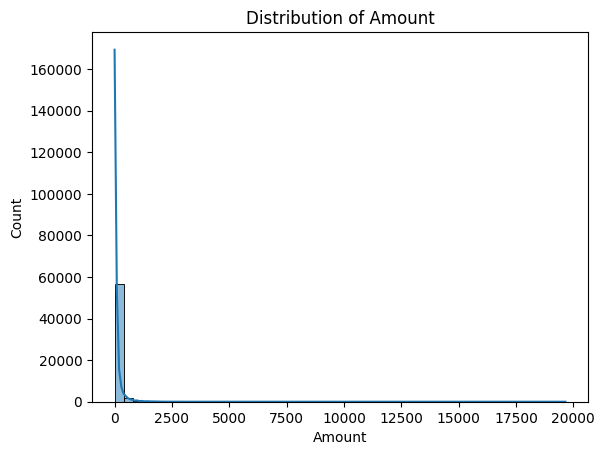

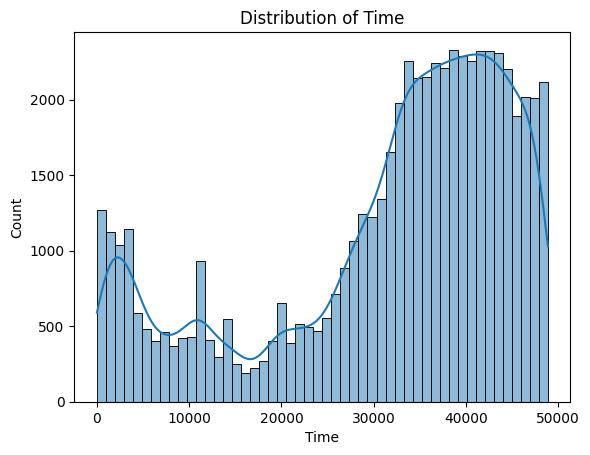

In [13]:
for col in ['Amount', 'Time']:
    plt.figure()
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


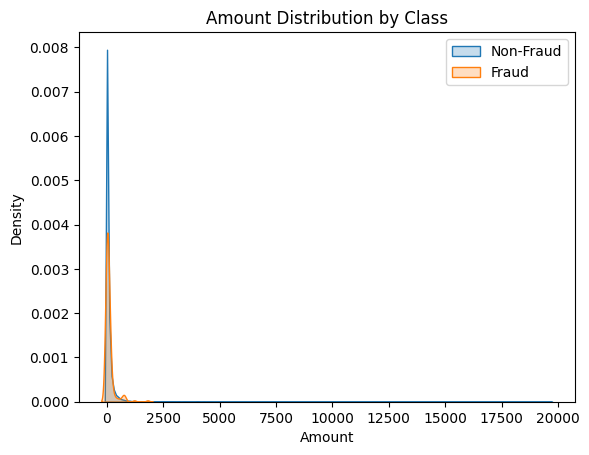

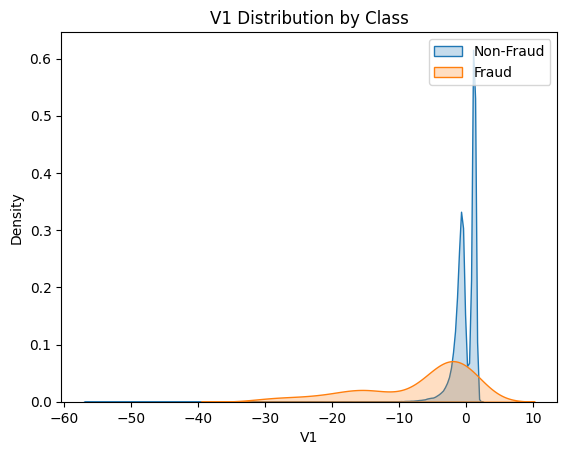

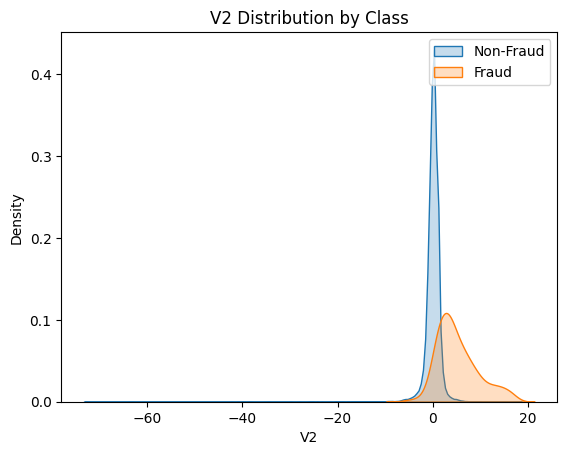

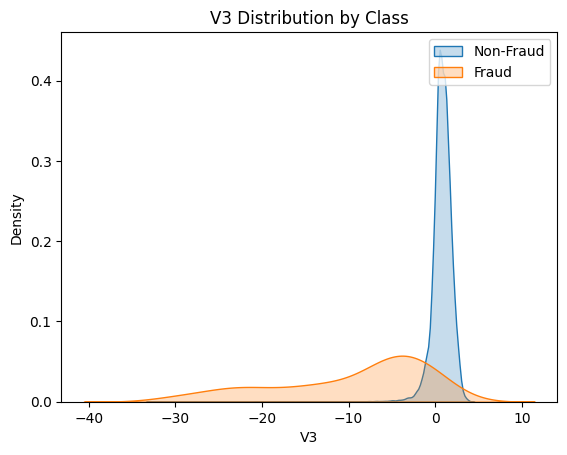

In [14]:
for col in ['Amount', 'V1', 'V2', 'V3']:  # Adjust the feature list as needed
    plt.figure()
    sns.kdeplot(df[df['Class'] == 0][col], label='Non-Fraud', shade=True)
    sns.kdeplot(df[df['Class'] == 1][col], label='Fraud', shade=True)
    plt.title(f'{col} Distribution by Class')
    plt.legend()
    plt.show()

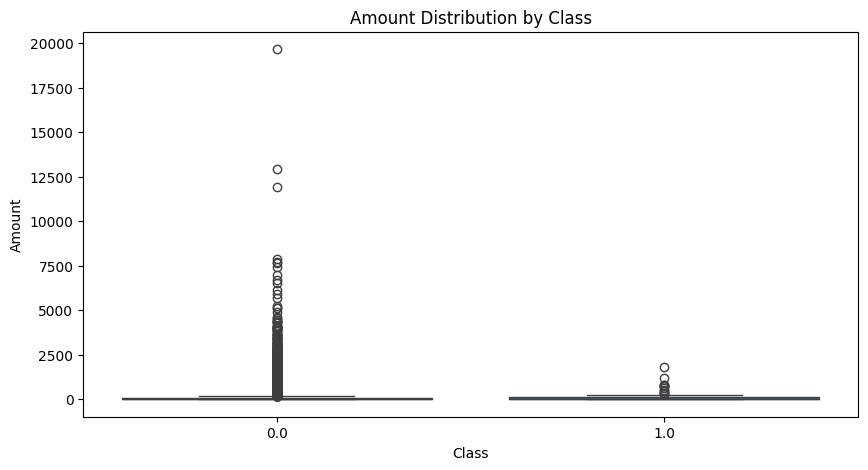

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')
plt.show()

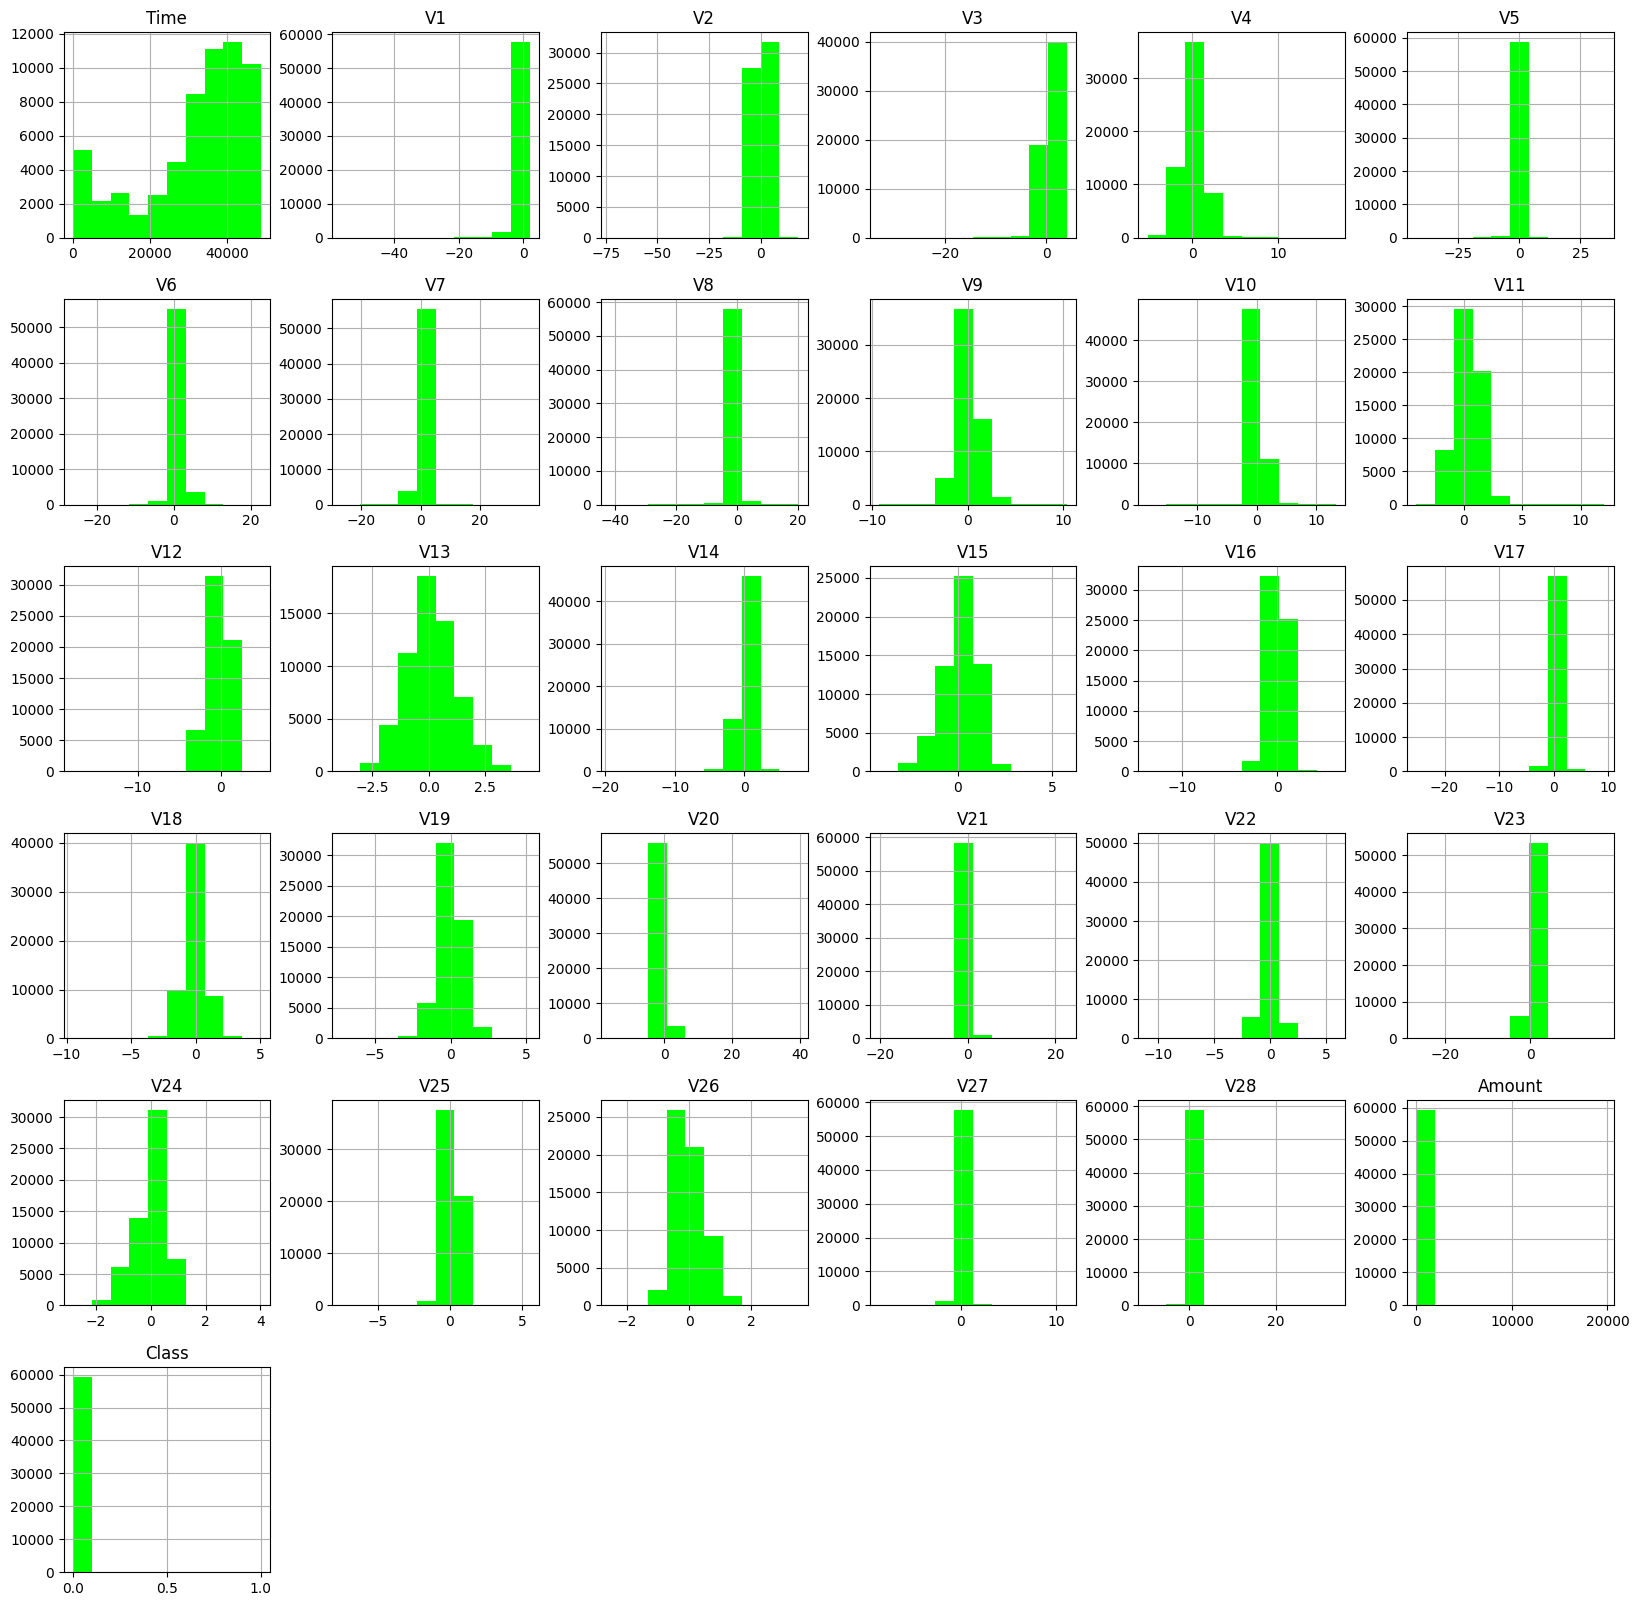

In [16]:
df.hist(figsize=(20,20),color='lime')
plt.show()

# Correlation Analysis

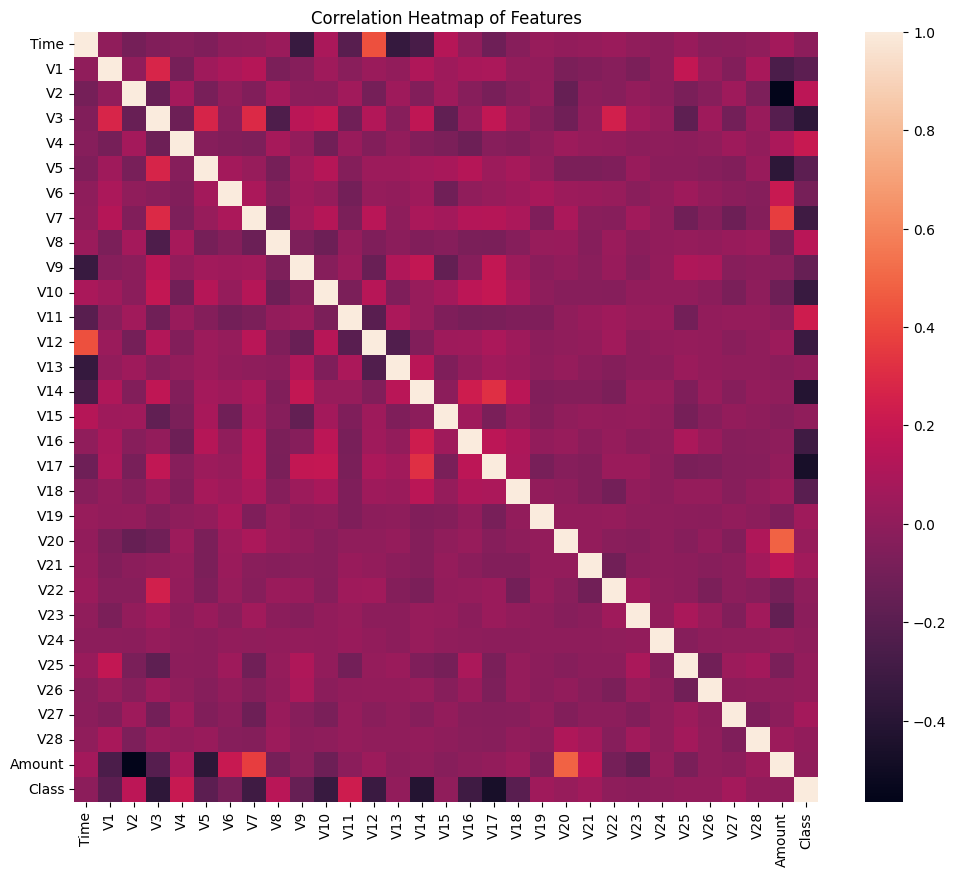

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

In [18]:
# Bin 'Amount' into categories
amount_bins = [-1, 0, 50, 100, 500, 1000, 5000, 10000]  # Define bin ranges
df['Amount_Bin'] = pd.cut(df['Amount'], bins=amount_bins)

# Crosstab between 'Class' and 'Amount_Bin'
amount_class_crosstab = pd.crosstab(df['Amount_Bin'], df['Class'], rownames=['Amount Range'], colnames=['Fraud Class'])
print(amount_class_crosstab)

Fraud Class      0.0  1.0
Amount Range             
(-1, 0]          473    4
(0, 50]        37574   99
(50, 100]       8675   30
(100, 500]     10591   20
(500, 1000]     1364    7
(1000, 5000]     655    2
(5000, 10000]     13    0


# Hypothesis Testing

In [19]:
from scipy.stats import ttest_ind

# Perform a t-test on 'Amount' between fraud and non-fraud transactions
fraud = df[df['Class'] == 1]['Amount']
non_fraud = df[df['Class'] == 0]['Amount']

In [20]:
fraud.shape

(162,)

In [21]:
non_fraud.shape

(59348,)

In [22]:
t_stat, p_val = ttest_ind(fraud, non_fraud)
print("T-test results: T-statistic = {:.3f}, P-value = {:.3f}".format(t_stat, p_val))

T-test results: T-statistic = -0.087, P-value = 0.930


# II. Data Cleaning and Transformation

In [23]:
df.shape

(59511, 32)

# Missing Value Treamtment

In [24]:
df = df.dropna()

In [25]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [26]:
# Impute missing values in 'Amount' with the median
df['Amount'].fillna(df['Amount'].median(), inplace=True)

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Bin
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,"(100, 500]"
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,"(0, 50]"
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,"(100, 500]"
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,"(100, 500]"
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,"(50, 100]"


# Outlier Treatment

In [28]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [29]:
df.shape

(53256, 32)

In [30]:
# Quantile-based binning
df['Amount_Bin'] = pd.qcut(df['Amount'], q=4, labels=['low', 'medium', 'high', 'very_high'])

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Bin
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,very_high
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,low
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,very_high
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,very_high
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0,low


# Feature Engineering

In [32]:
# Standardize the 'Amount' feature using z-score normalization
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

In [33]:
start_datetime = pd.to_datetime("2013-09-01 00:00:00")
# Convert 'Time' to datetime by adding seconds to start_datetime
df['Transaction_DateTime'] = start_datetime + pd.to_timedelta(df['Time'], unit='s')

In [34]:
df['Transaction_DateTime'].head()

,Transaction_DateTime
0,2013-09-01 00:00:00
1,2013-09-01 00:00:00
3,2013-09-01 00:00:01
4,2013-09-01 00:00:02
5,2013-09-01 00:00:02


In [35]:
# Convert 'Time' to hours
df['Hour'] = df['Time'] / 3600  # Now 'Hour' ranges from 0 to 48
df['Hour'] = df['Hour'].astype(int)  # Convert to integer hours for grouping

# Filter fraud transactions (Class == 1) and count per hour
fraud_counts = df[df['Class'] == 1].groupby('Hour').size()
fraud_counts = fraud_counts.reindex(range(48), fill_value=0)

print(fraud_counts.head(10))

Hour
0     1
1     1
2    20
3    13
4     5
5    10
6     3
7    22
8     5
9    14
dtype: int64


Fraud Transactions per hour is seen above

In [36]:
# Convert Time to hours (0-48) and create cyclic features
df['Hour'] = df['Time'] / 3600 % 24
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Amount_Bin,Transaction_DateTime,Hour,Hour_sin,Hour_cos
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,2.303780,0.0,very_high,2013-09-01 00:00:00,0.000000,0.000000,1.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,-0.795369,0.0,low,2013-09-01 00:00:00,0.000000,0.000000,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,1.752839,0.0,very_high,2013-09-01 00:00:01,0.000278,0.000073,1.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,0.624169,0.0,very_high,2013-09-01 00:00:02,0.000556,0.000145,1.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.105915,0.253844,0.081080,-0.774698,0.0,low,2013-09-01 00:00:02,0.000556,0.000145,1.0


# III. Balancing Data

In [38]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [39]:
# Check data types in X
print(X.dtypes)

Time                             int64
V1                             float64
V2                             float64
V3                             float64
V4                             float64
V5                             float64
V6                             float64
V7                             float64
V8                             float64
V9                             float64
V10                            float64
V11                            float64
V12                            float64
V13                            float64
V14                            float64
V15                            float64
V16                            float64
V17                            float64
V18                            float64
V19                            float64
V20                            float64
V21                            float64
V22                            float64
V23                            float64
V24                            float64
V25                      

In [40]:
# Drop the 'Transaction_DateTime' column
X = X.drop(columns=['Transaction_DateTime'])

In [41]:
# Define a mapping dictionary
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping
X['Amount_Bin'] = X['Amount_Bin'].map(mapping)

In [42]:
from sklearn.preprocessing import LabelEncoder
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Amount_Bin' column
X['Amount_Bin'] = label_encoder.fit_transform(X['Amount_Bin']) + 1

In [43]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# IV. Predictive Modelling

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Initializing the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [46]:
y_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [47]:
print("Logistic Regression Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Logistic Regression Model Metrics:
Accuracy: 0.9800884955752213
Precision: 0.9893812144029347
Recall: 0.9703654610869153
F1 Score: 0.9797810812102672
ROC-AUC: 0.9978128539495447


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [49]:
print("Decision Tree Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Decision Tree Model Metrics:
Accuracy: 0.9989173413669742
Precision: 0.9983921308994609
Recall: 0.9994319257716342
F1 Score: 0.9989117577478117
ROC-AUC: 0.9978128539495447


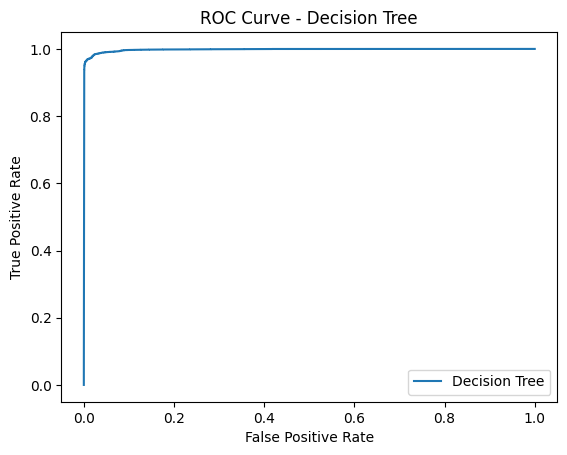

In [50]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

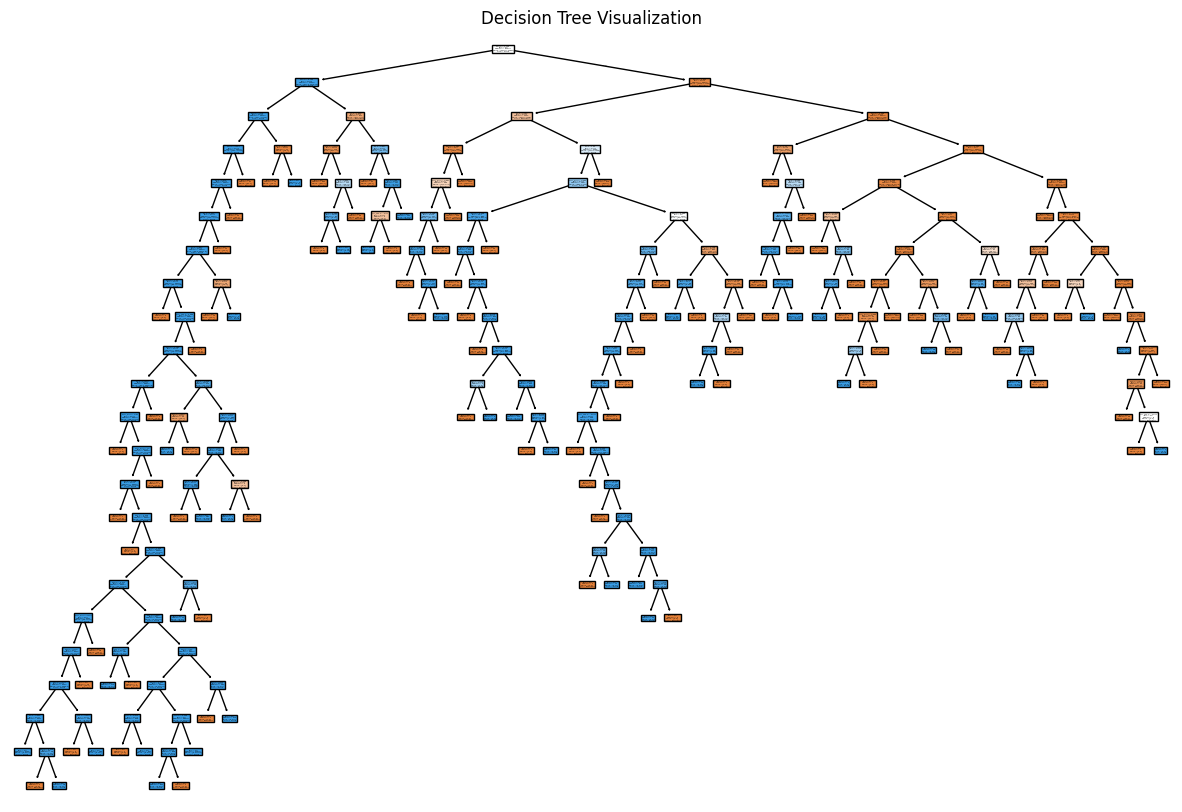

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to list format
feature_names = X_train.columns.tolist()

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=feature_names, class_names=["Not Fraud", "Fraud"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forest

In [52]:

rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of the tree
    random_state=42,   # Ensures reproducibility
    n_jobs=-1 )

In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [54]:
print("Random Forest Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Random Forest Model Metrics:
Accuracy: 0.9989173413669742
Precision: 0.9983921308994609
Recall: 0.9994319257716342
F1 Score: 0.9989117577478117
ROC-AUC: 0.9978128539495447


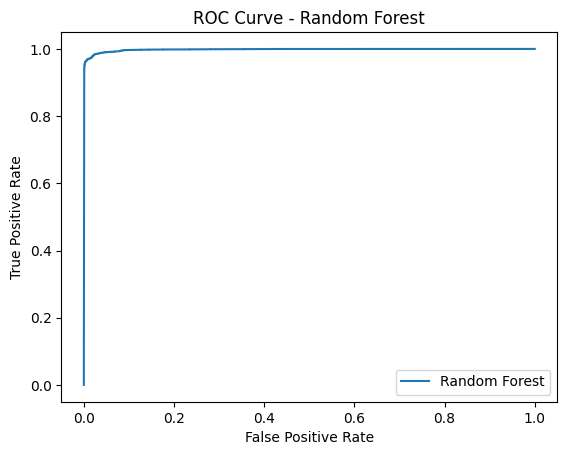

In [55]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

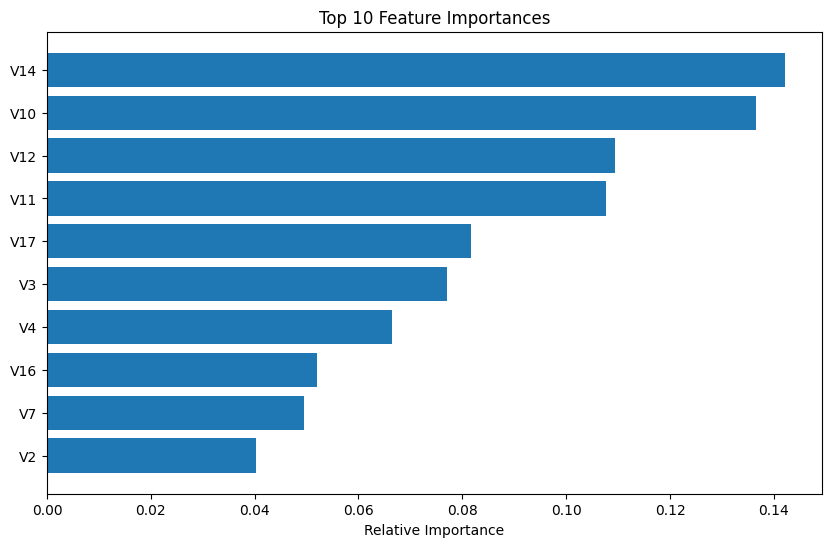

In [56]:
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# V. Model Validation and Hyperparameter Tuning

# Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [58]:
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Gradient Boosting Performance:
Accuracy: 0.9964
Precision: 0.9966
Recall: 0.9962
F1 Score: 0.9964


# Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
lr_cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
print("Logistic Regression CV F1 Scores:", lr_cv_scores)
print("Mean F1 Score:", lr_cv_scores.mean())

Logistic Regression CV F1 Scores: [0.07509387 0.58227848 0.12903226 0.75       0.37837838]
Mean F1 Score: 0.38295659695794415


In [60]:
# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(dt, X, y, cv=5, scoring='f1')
print("Decision Tree CV F1 Scores:", dt_cv_scores)
print("Mean F1 Score:", dt_cv_scores.mean())

Decision Tree CV F1 Scores: [0.00591133 0.32727273 0.54166667 0.8        0.70833333]
Mean F1 Score: 0.4766368114643977


In [61]:
# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print("Random Forest CV F1 Scores:", rf_cv_scores)
print("Mean F1 Score:", rf_cv_scores.mean())

Random Forest CV F1 Scores: [0.00591366 0.63157895 0.66666667 0.91803279 0.69565217]
Mean F1 Score: 0.5835688470778522


# Hyperparameter Tuning

In [62]:
# Logistic Regression
lr_param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='f1')
lr_grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
best_lr_model = lr_grid_search.best_estimator_

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


In [63]:
y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(accuracy,precision,recall,f1,cm )

0.973404255319149 0.9860935524652339 0.9600454459382692 0.972895178699928 [[10539   143]
 [  422 10140]]


# The Best Model

In [64]:
model_predictions = {
    "Logistic Regression": log_reg.predict(X_test),
    "Decision Tree": dt.predict(X_test),
    "Random Forest": rf.predict(X_test)
}


In [65]:
results = []

for model_name, y_pred in model_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    })

for result in results:
    print(result)

{'Model': 'Logistic Regression', 'Accuracy': 0.9800884955752213, 'Precision': 0.9893812144029347, 'Recall': 0.9703654610869153, 'F1 Score': 0.9797810812102672}
{'Model': 'Decision Tree', 'Accuracy': 0.9989173413669742, 'Precision': 0.9983921308994609, 'Recall': 0.9994319257716342, 'F1 Score': 0.9989117577478117}
{'Model': 'Random Forest', 'Accuracy': 0.9993409903972886, 'Precision': 0.9992427110942824, 'Recall': 0.9994319257716342, 'F1 Score': 0.9993373094764745}


<Axes: xlabel='Metric', ylabel='Score'>

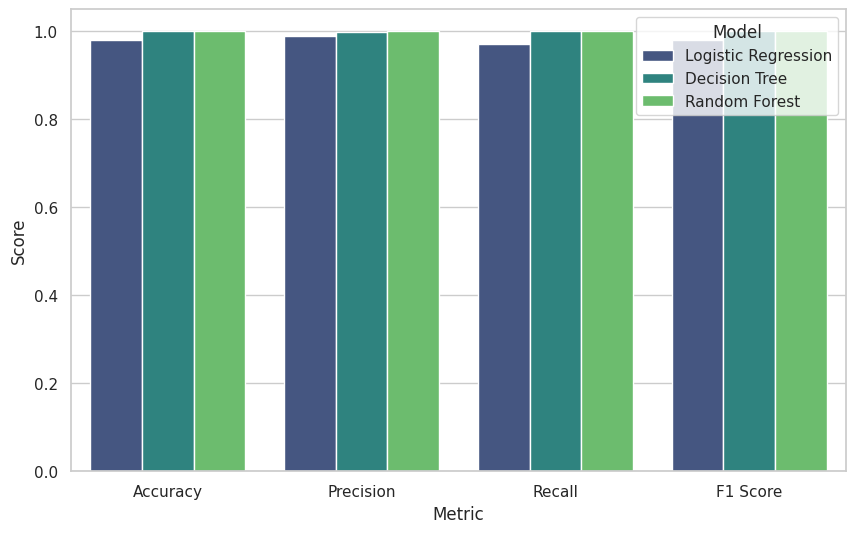

In [66]:
results_df = pd.DataFrame(results)

results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette="viridis")

As Random Forest is seen to have high evaluation metrics, there is a chance of overfitting. Thus, we choose the Decision Tree and Logistic Regression models. Among the two, Logistic Regression model best classifies the data into fraud and non-fraud.

# Time Series Analysis

In [68]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(fraud_counts, order=(1, 1, 1))
model_fit = model.fit()

In [69]:
forecast = model_fit.forecast(steps=48)
print(forecast)

48    0.000010
49    0.000008
50    0.000008
51    0.000008
52    0.000008
53    0.000008
54    0.000008
55    0.000008
56    0.000008
57    0.000008
58    0.000008
59    0.000008
60    0.000008
61    0.000008
62    0.000008
63    0.000008
64    0.000008
65    0.000008
66    0.000008
67    0.000008
68    0.000008
69    0.000008
70    0.000008
71    0.000008
72    0.000008
73    0.000008
74    0.000008
75    0.000008
76    0.000008
77    0.000008
78    0.000008
79    0.000008
80    0.000008
81    0.000008
82    0.000008
83    0.000008
84    0.000008
85    0.000008
86    0.000008
87    0.000008
88    0.000008
89    0.000008
90    0.000008
91    0.000008
92    0.000008
93    0.000008
94    0.000008
95    0.000008
Name: predicted_mean, dtype: float64


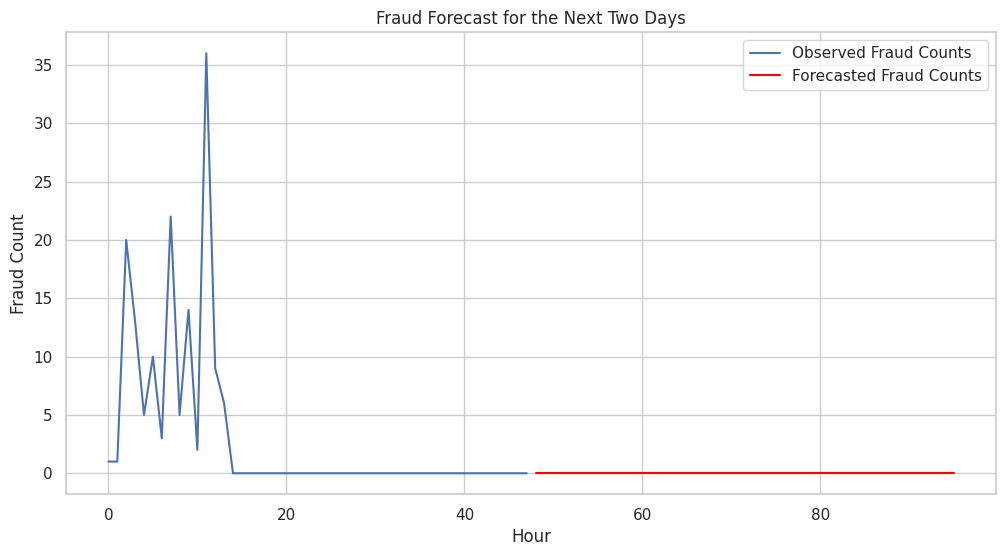

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(fraud_counts, label='Observed Fraud Counts')
plt.plot(range(48, 96), forecast, color='red', label='Forecasted Fraud Counts')
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.legend()
plt.title('Fraud Forecast for the Next Two Days')
plt.show()


Here, we forecast the number of frauds occouring in the next 48 hours.

# Model Deployment

In [71]:
import joblib

joblib.dump(best_lr_model, 'logreg_model.pkl')

['logreg_model.pkl']

In [72]:
joblib.dump(dt, 'dt_model.pkl')

['dt_model.pkl']

In [73]:
pip install streamlit joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [74]:
import streamlit as st

# Load the saved models
logreg_model = joblib.load('logreg_model.pkl')
dt_model = joblib.load('dt_model.pkl')

# App Title
st.title("Credit Card Fraud Detection")

2024-11-17 04:56:09.471 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.704 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-17 04:56:09.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [75]:
# Select Model
model_choice = st.selectbox("Select Model:", ("Logistic Regression", "Decision Tree"))

# Input Features
st.subheader("Enter Transaction Features:")
feature1 = st.number_input("Feature 1 (e.g., Time):", min_value=0.0, step=0.1)
feature2 = st.number_input("Feature 2 (e.g., V1):", min_value=-10.0, max_value=10.0, step=0.1)
feature3 = st.number_input("Feature 3 (e.g., V2):", min_value=-10.0, max_value=10.0, step=0.1)

2024-11-17 04:56:09.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.743 Session state does not function when running a script without `streamlit run`
2024-11-17 04:56:09.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56:09.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 04:56